<a href="https://colab.research.google.com/github/nug1209/PwC_Switzerland_Digital_Intelligence_Virtual_Case_Experience/blob/main/PwC_Task_5_R_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
library("tidyverse")
library("ggplot2")
library("readxl")

In [7]:
dfB2 <- read_excel("Task_5_Data_B2.xlsx")
# colnames(dfB2)
# head(dfB2)

In [8]:
dfB3 <- read_excel("Task_5_Data_B3.xlsx")
dfB3 <- dfB3 %>% rename(reaction_group = 'Reaction Group', case_count = 'Number of Cases')
dfB3 <- dfB3[!(dfB3$reaction_group == 'Total Cases'),]

head(dfB3)

reaction_group,case_count
<chr>,<dbl>
General Disorders And Administration Site Conditions,6855
"Injury, Poisoning And Procedural Complications",4336
Nervous System Disorders,4254
Psychiatric Disorders,2855
Musculoskeletal And Connective Tissue Disorders,2034
Gastrointestinal Disorders,1599


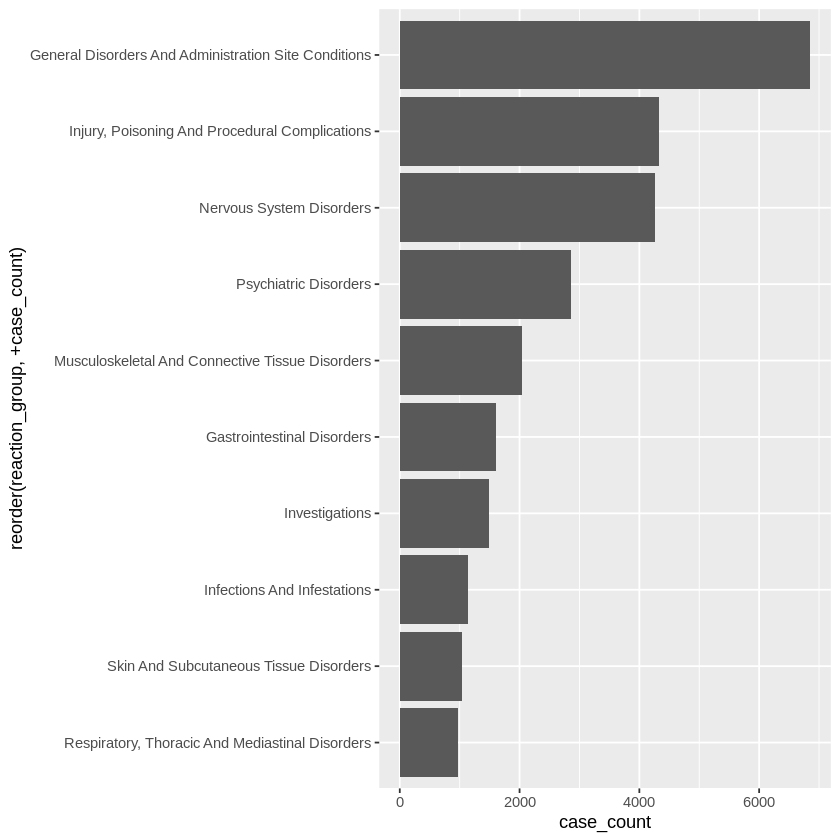

In [9]:
ggplot(head(dfB3, 10), aes(x = reorder(reaction_group, +case_count), y = case_count)) + geom_bar(stat='identity') + coord_flip()

In [10]:
dfB4_full <- read_excel("Task_5_Data_B4.xlsx")
# colnames(dfB4_full)
# head(dfB4_full)
nrow(dfB4_full)

[1] 13021

In [11]:
dfB4 <- subset(dfB4_full, select=c(Reactions))
dfB4 <- dfB4 %>% rename(reaction = Reactions)
dfB4 <- dfB4 %>% separate_longer_delim(reaction, delim = ';')
# head(dfB4)

In [12]:
dfB4_freq <- table(dfB4$reaction)
dfB4_freq <- dfB4_freq[order(dfB4_freq, decreasing=FALSE)]
dfB4_freq <- tail(dfB4_freq, 10)
# dfB4_freq

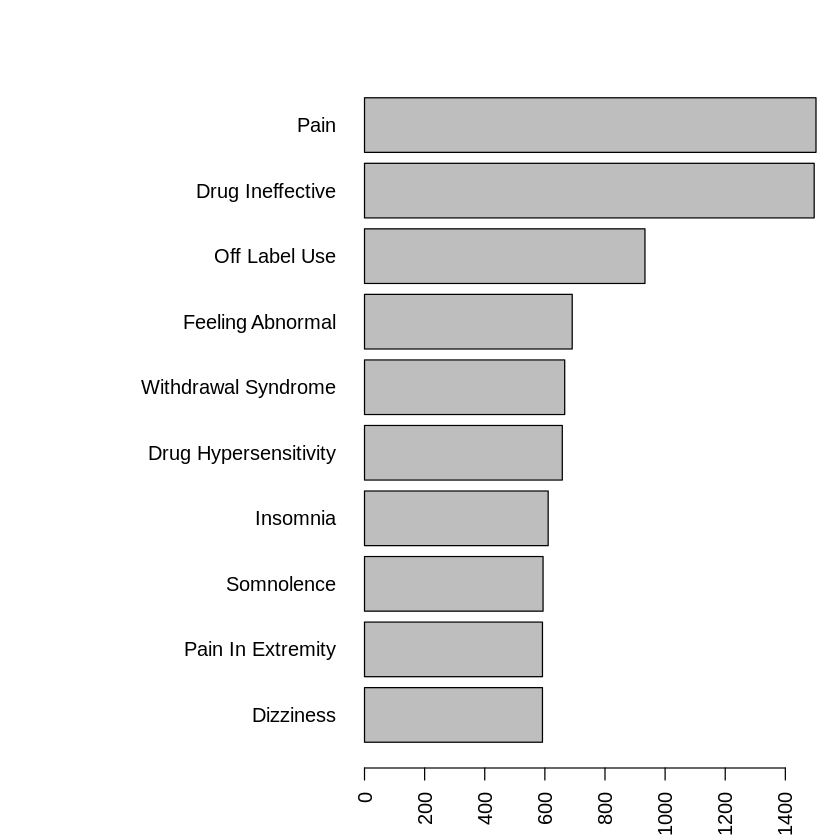

In [13]:
par(mar=c(3, 15, 3, 1))
barplot(dfB4_freq, horiz=TRUE, las=2)